In [84]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import numpy as np
import seaborn as sns

In [85]:
# read data
df = pd.read_csv('weekly_data.csv', parse_dates=True)
# drop first row which contain metadata
df.drop(df.index[0], axis=0, inplace=True)
df.reset_index(inplace=True)
df.drop('index', axis=1, inplace=True)
# drop date column which contain metadata
df.drop(['date_from', 'date_to'], axis=1, inplace=True)
# convert commas to dots
df = df.apply(lambda x: x.astype(str).str.replace(',','.').astype(float))
# convert to numeric and use zeros for NaNs
df = df.fillna(0).astype(float)
# show frame
df

,weekly_fish_landings,fishoil_price_omega3,fishoil_price_aquagrade,fishmeal_price_super_prime,fishoil_production_peru_nc,fishmeal_production_peru_nc,fishoil_production_nc_computed,fishoil_production_south_computed,indicator_temperature_cold,indicator_temperature_low,...,dha_lower_bound,dha_upper_bound,quota_nc,caught_nc,quota_fulfilled_nc,quota_south,caught_south,quota_fulfilled_south,expected_weeks_until_opening_nc,expected_weeks_until_opening_south
0,3000.0,3600.0,3300.0,1810.0,100.0,750.0,0.000,2.420000,0.0,1.0,...,12.0,15.666667,0.00,0.0000,0.000,0.49,0.11,0.226,3.0,0.0
1,10000.0,3600.0,3300.0,1810.0,200.0,2500.0,0.000,2.640000,0.0,1.0,...,12.0,15.000000,0.00,0.0000,0.000,0.49,0.12,0.247,2.0,0.0
2,4500.0,3600.0,3300.0,1810.0,100.0,1100.0,0.000,2.860000,0.0,1.0,...,12.0,14.333333,0.00,0.0000,0.000,0.49,0.13,0.267,2.0,0.0
3,5000.0,3600.0,3300.0,1810.0,100.0,1200.0,0.000,3.124000,0.0,1.0,...,12.0,13.666667,0.00,0.0000,0.000,0.49,0.14,0.292,1.0,0.0
4,200000.0,3600.0,3300.0,1810.0,3750.0,48000.0,55.840,3.214200,0.0,1.0,...,12.0,13.000000,2.79,0.0518,0.019,0.49,0.15,0.300,0.0,0.0
5,268000.0,3600.0,3300.0,1810.0,2650.0,64000.0,41.880,3.425400,0.0,1.0,...,12.0,13.000000,2.79,0.3191,0.114,0.49,0.16,0.320,0.0,0.0
6,192000.0,3600.0,3300.0,1750.0,6250.0,48200.0,47.464,3.608000,0.0,1.0,...,10.0,12.000000,2.79,0.5663,0.203,0.49,0.16,0.337,0.0,0.0
7,265000.0,3600.0,3300.0,1750.0,9000.0,63000.0,64.216,3.680600,0.0,1.0,...,10.0,12.000000,2.79,0.7615,0.273,0.49,0.17,0.344,0.0,0.0
8,313000.0,3700.0,3300.0,1750.0,12000.0,73000.0,69.800,3.856600,0.0,1.0,...,10.0,12.000000,2.79,1.1243,0.403,0.49,0.18,0.360,0.0,0.0
9,280000.0,4200.0,3700.0,1750.0,11500.0,65000.0,78.176,4.087125,0.0,1.0,...,10.0,12.000000,2.79,1.4074,0.504,0.49,0.18,0.373,0.0,0.0


This code can be used to choose specific rows/columns of the data to get rid of some of the metadata that is used in google sheets and to pick specific features.

In [86]:
# only use columns (x - y) as data
#df.drop(df.columns[np.r_[x, y:len(df.columns)]], axis=1, inplace=True)

# drop first x rows which contain metadata
#df.drop(df.index[0:x], axis=0, inplace=True)

This code was originally present in this file but I do not know what the intention for it was.

In [87]:
# monthly_df_ip = monthly_df.interpolate(method = 'linear', direction = 'forward')
# monthly_df.dtypes

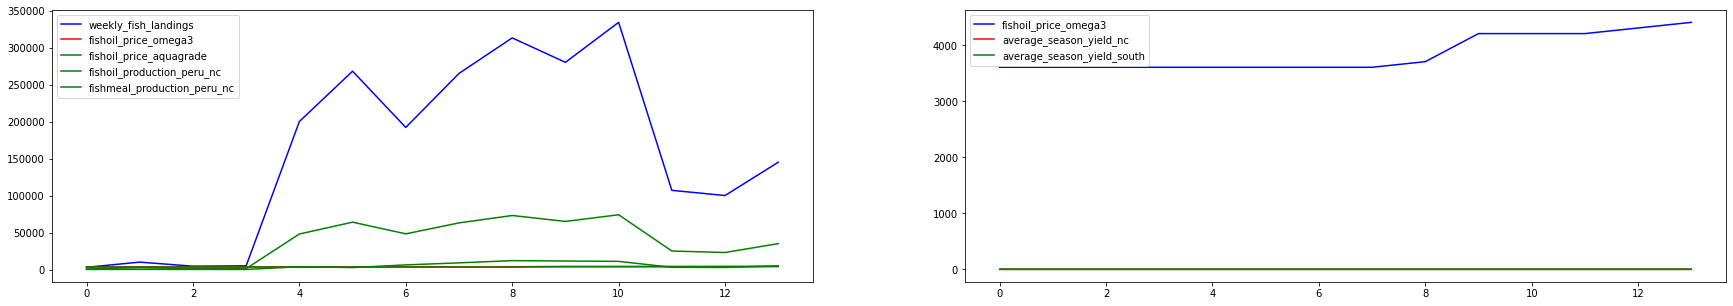

In [88]:
# plot all data
fig, axs = plt.subplots(1,2,figsize=(30, 5))

df.plot(kind='line', y='weekly_fish_landings', color='blue', ax=axs[0])
df.plot(kind='line', y='fishoil_price_omega3', color='red', ax=axs[0])
df.plot(kind='line', y='fishoil_price_aquagrade', color='green', ax=axs[0])
df.plot(kind='line', y='fishoil_production_peru_nc', color='green', ax=axs[0])
df.plot(kind='line', y='fishmeal_production_peru_nc', color='green', ax=axs[0])

df.plot(kind='line', y='fishoil_price_omega3', color='blue', ax=axs[1])
df.plot(kind='line', y='average_season_yield_nc', color='red', ax=axs[1])
df.plot(kind='line', y='average_season_yield_south', color='green', ax=axs[1])

plt.show()

In [89]:
# save data without processing
df.to_csv("../dataframes/weekly.csv")

# transform data to use log ratios
df_processed = df.copy()
# replace all prices by log ratios
for column in ['weekly_fish_landings', 'fishoil_price_omega3', 'fishoil_price_aquagrade', 'fishmeal_price_super_prime', 'fishoil_production_peru_nc', 'fishmeal_production_peru_nc', 'fishoil_production_nc_computed', 'fishoil_production_south_computed']:
    for index in range(0, len(df[column])):
        print(df[column])
        # first index and indices whith value zero are exceptions
        if ((index < 1) or (df[column][index-1] <= 0) or (df[column][index] <= 0)):
            # set return of zero
            df_processed[column][index] = 0
        else:
            # replace price by return
            df_processed[column][index] = np.log(df[column][index]/df[column][index-1])
df_processed['fishoil_price_omega3_value'] = df.copy()['fishoil_price_omega3']

# save data with processing
df_processed.to_csv("../dataframes/weekly_processed.csv")

0       3000.0
1      10000.0
2       4500.0
3       5000.0
4     200000.0
5     268000.0
6     192000.0
7     265000.0
8     313000.0
9     280000.0
10    334000.0
11    107000.0
12    100000.0
13    145000.0
Name: weekly_fish_landings, dtype: float64
0       3000.0
1      10000.0
2       4500.0
3       5000.0
4     200000.0
5     268000.0
6     192000.0
7     265000.0
8     313000.0
9     280000.0
10    334000.0
11    107000.0
12    100000.0
13    145000.0
Name: weekly_fish_landings, dtype: float64
0       3000.0
1      10000.0
2       4500.0
3       5000.0
4     200000.0
5     268000.0
6     192000.0
7     265000.0
8     313000.0
9     280000.0
10    334000.0
11    107000.0
12    100000.0
13    145000.0
Name: weekly_fish_landings, dtype: float64
0       3000.0
1      10000.0
2       4500.0
3       5000.0
4     200000.0
5     268000.0
6     192000.0
7     265000.0
8     313000.0
9     280000.0
10    334000.0
11    107000.0
12    100000.0
13    145000.0
Name: weekly_fish_landings, dty

The goal of the following plots are to spot data-sets that are drivers of the price in both the short- and long-term.<br>
The drivers are plotted in the first plot together with the price, over a two-year period.<br>
The second plot contains only the price.<br>

The graph shows that the total amount of fish oil export in Peru in metric ton is very correlated to the FOB export value of fish oil in Peru.
Moreover, we can see that the fish oil export in Peru in metric ton is negatively correlated with the fish oil price in Peru meaning that when the amount of fish oil that is exported increases, the price decreases. It can also be seen that the prices of fish meal in Hamburg are extremely stable compared to the fish oil prices in Peru, thus they do not seem to be correlated.

In [90]:
# plot two years of input features to predict one year of output
def plot_features(features):
    # plot all data
    fig, axs = plt.subplots(figsize=(30, 5))

    palette = sns.color_palette("hls", len(features))
    for (feature, color) in zip(features, palette):
        df_processed[features].plot(kind='line', y=feature, color=color, ax=axs)

C:\Users\seppe\AppData\Local\Temp\ipykernel_18512\1364241926.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs = plt.subplots(figsize=(30, 5))


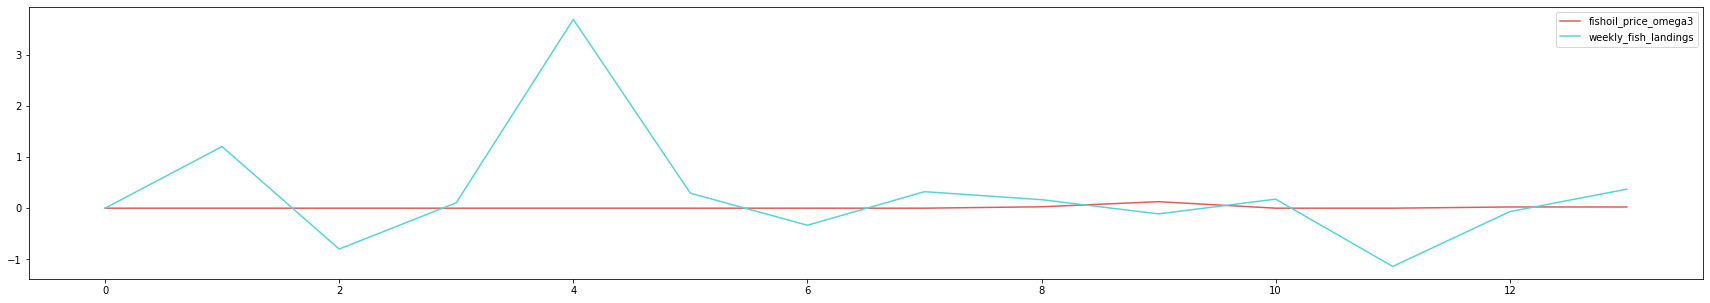

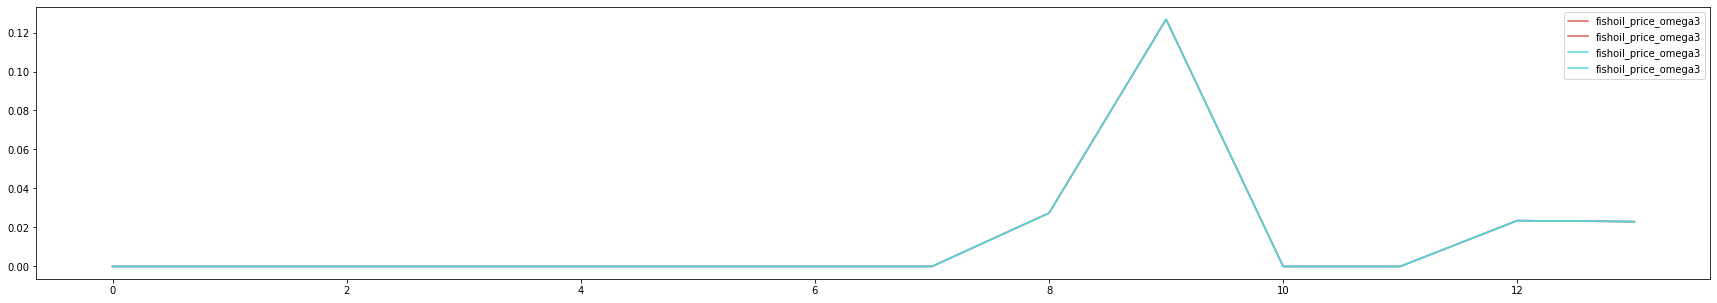

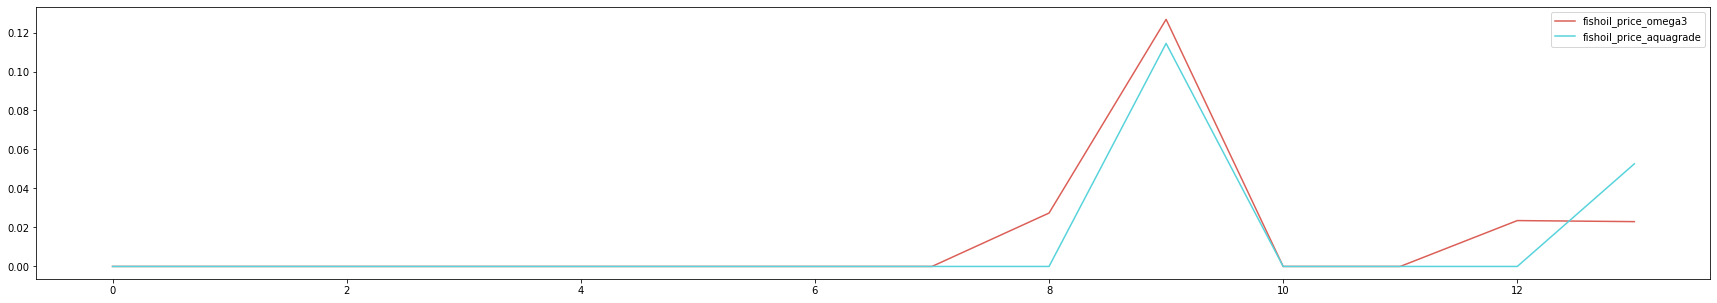

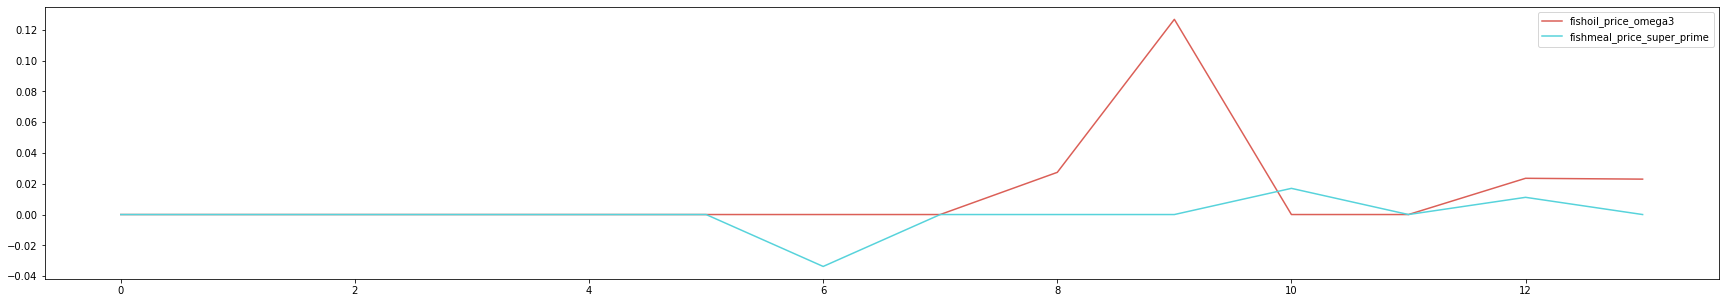

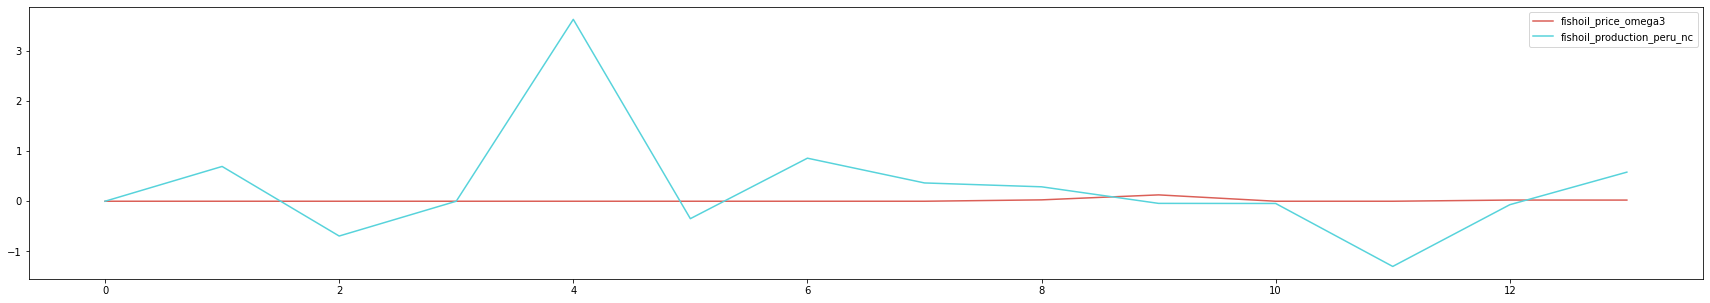

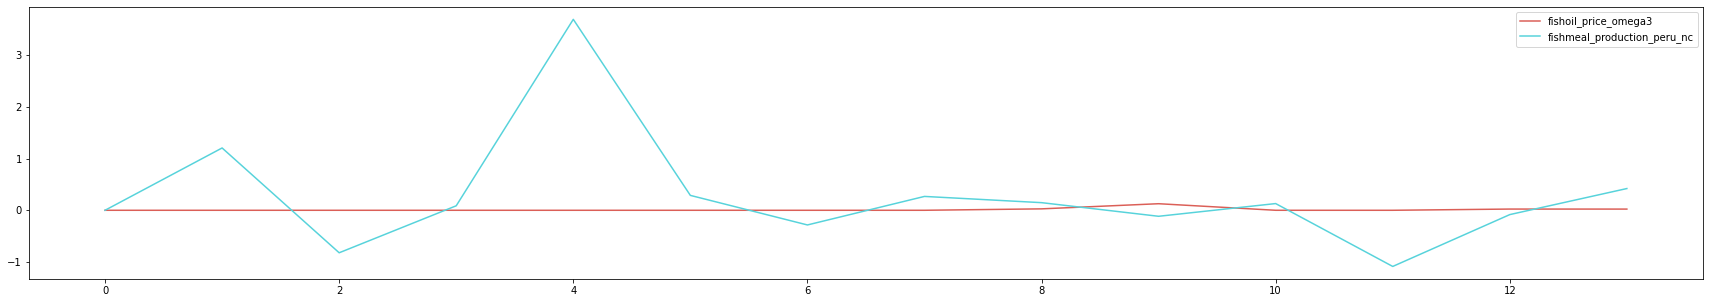

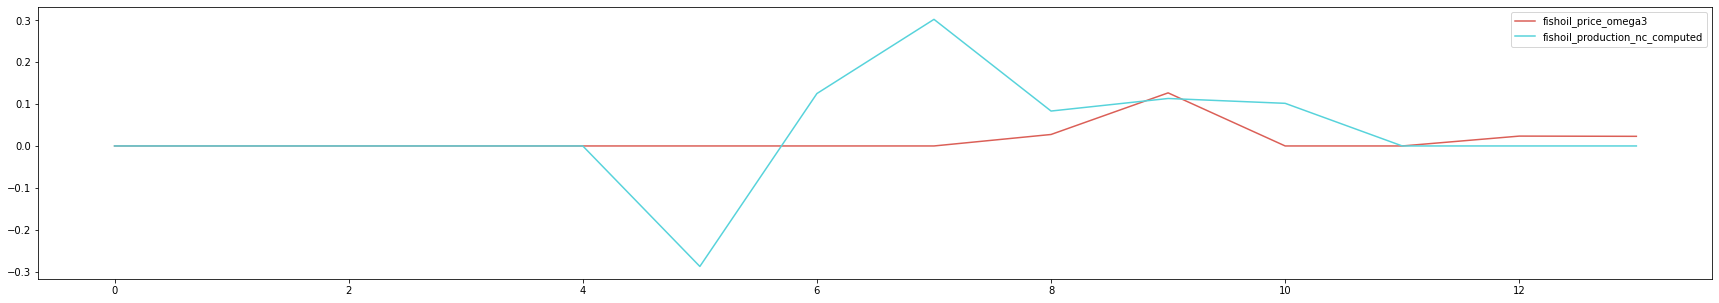

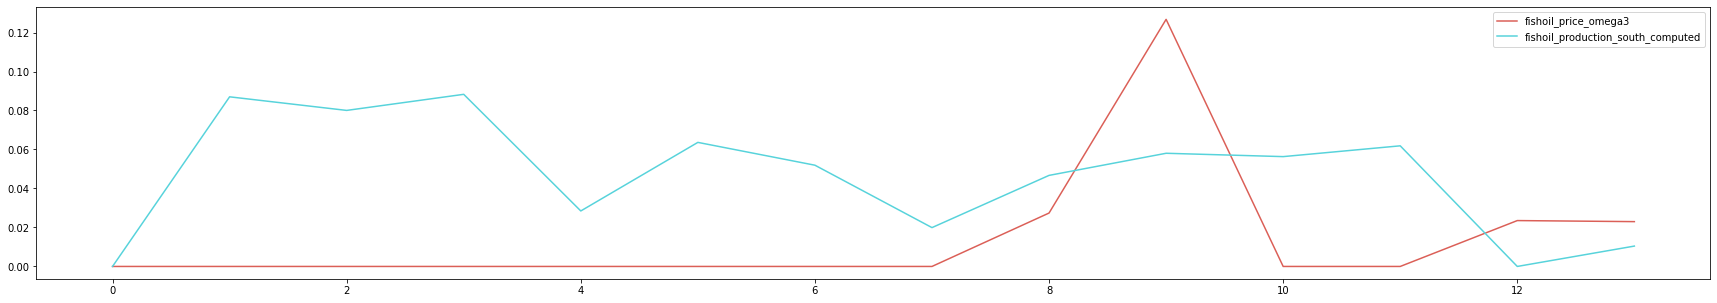

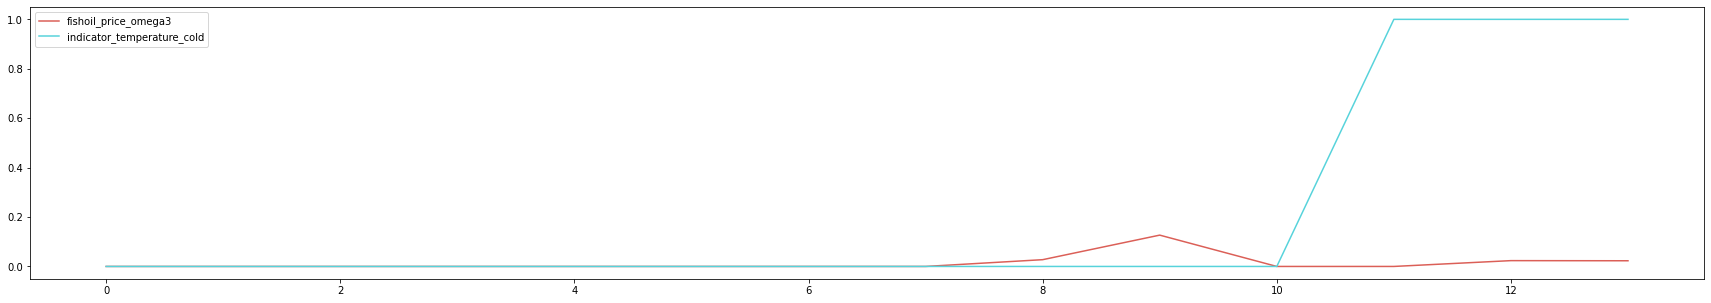

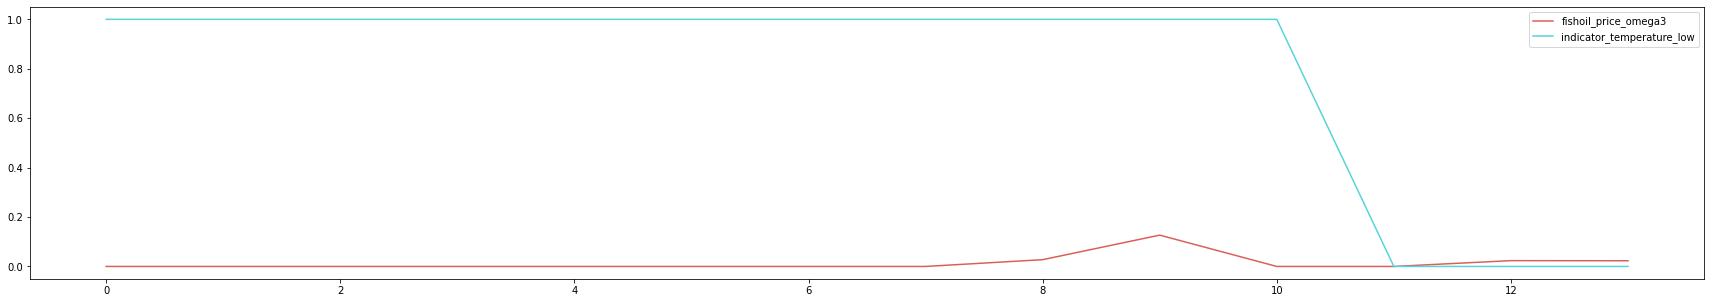

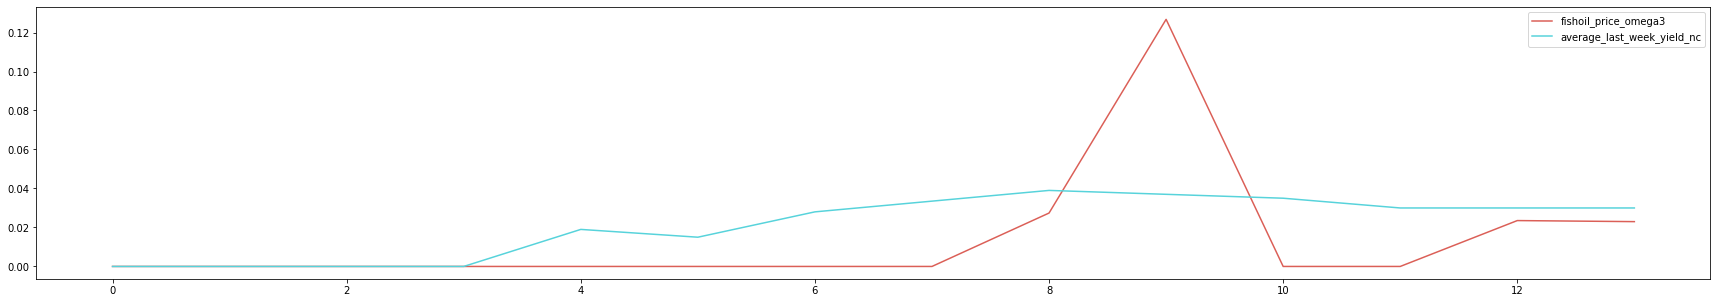

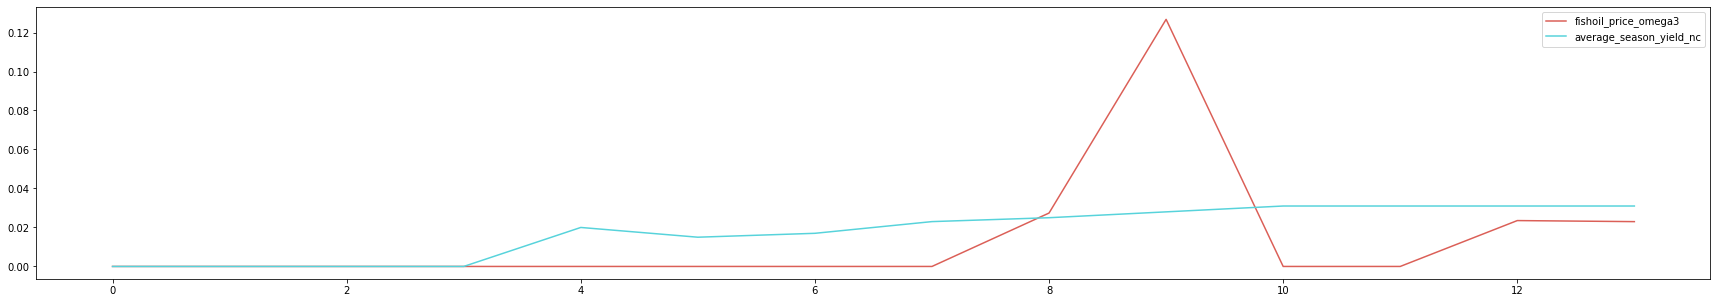

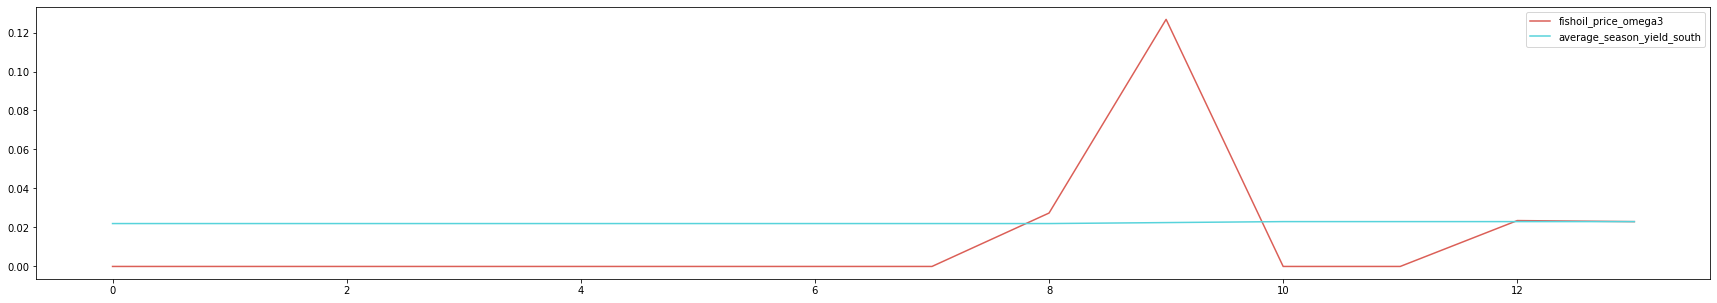

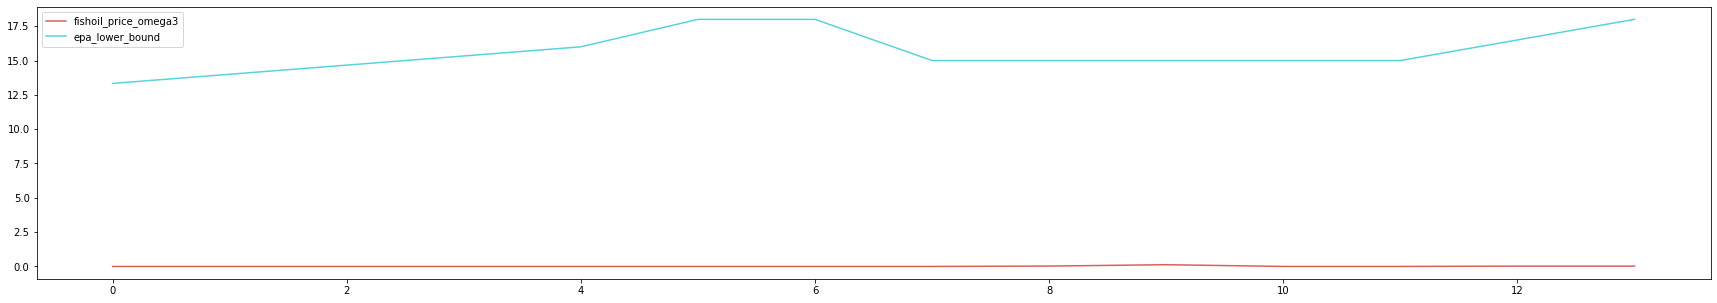

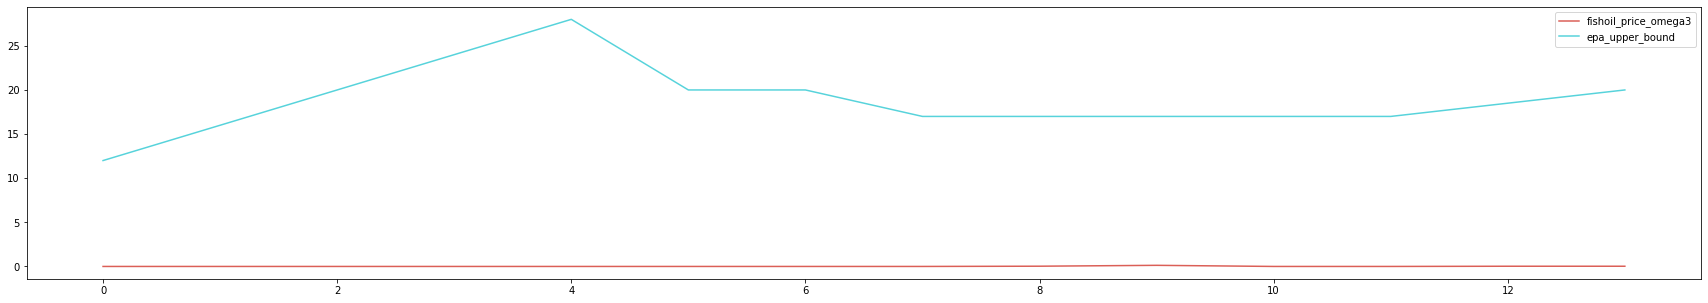

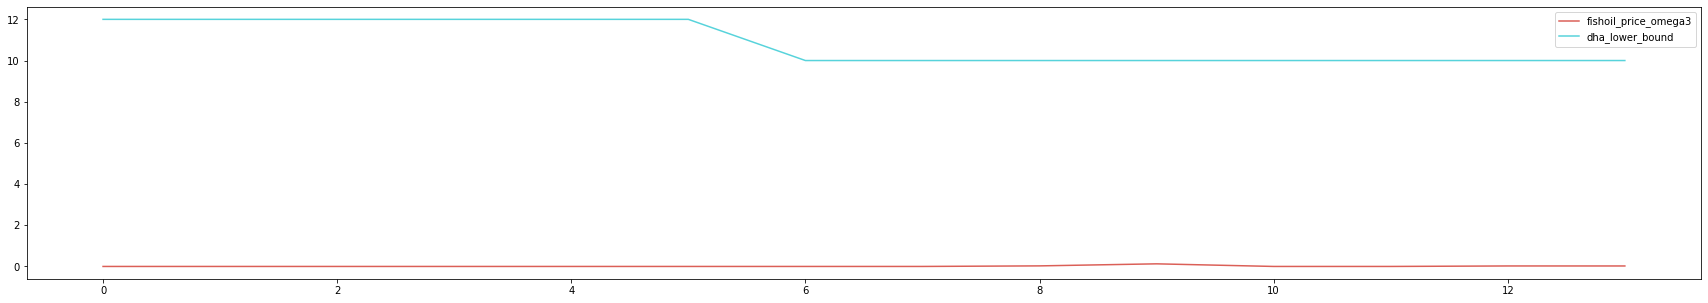

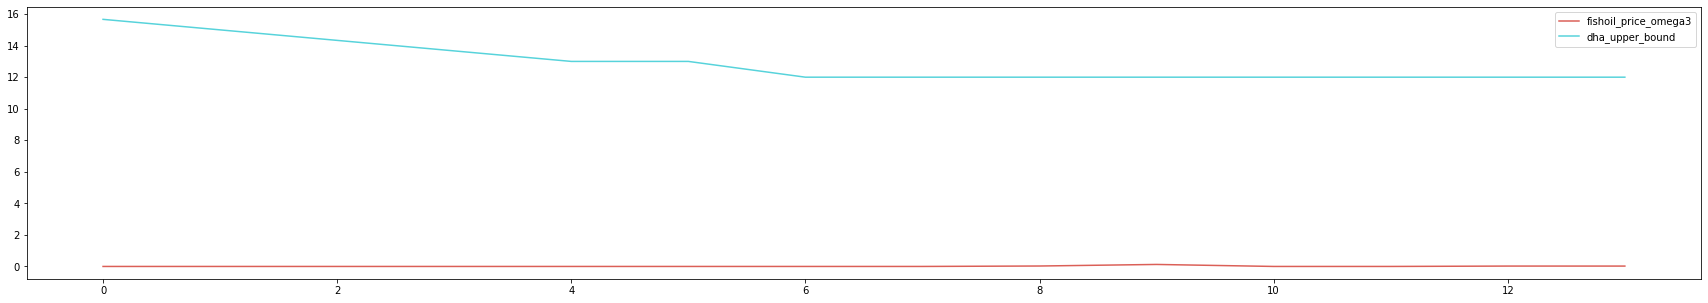

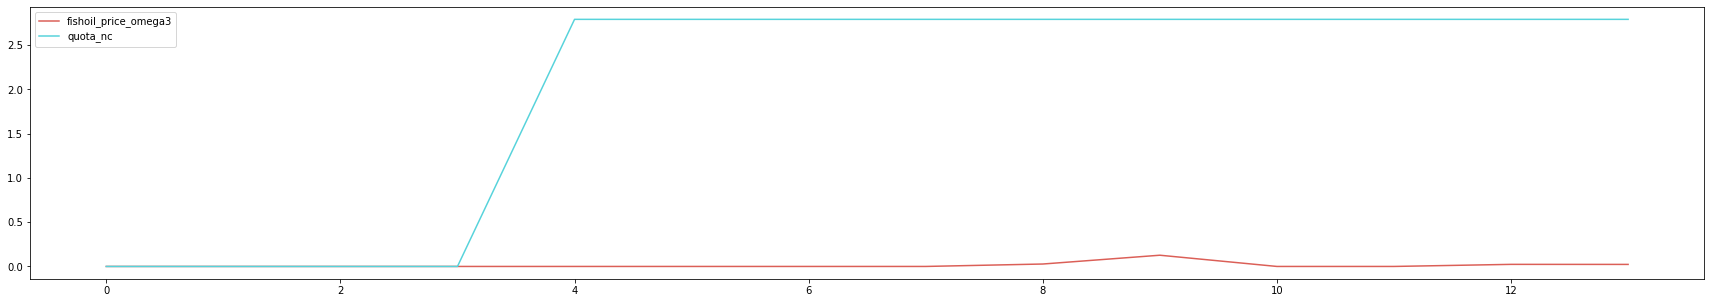

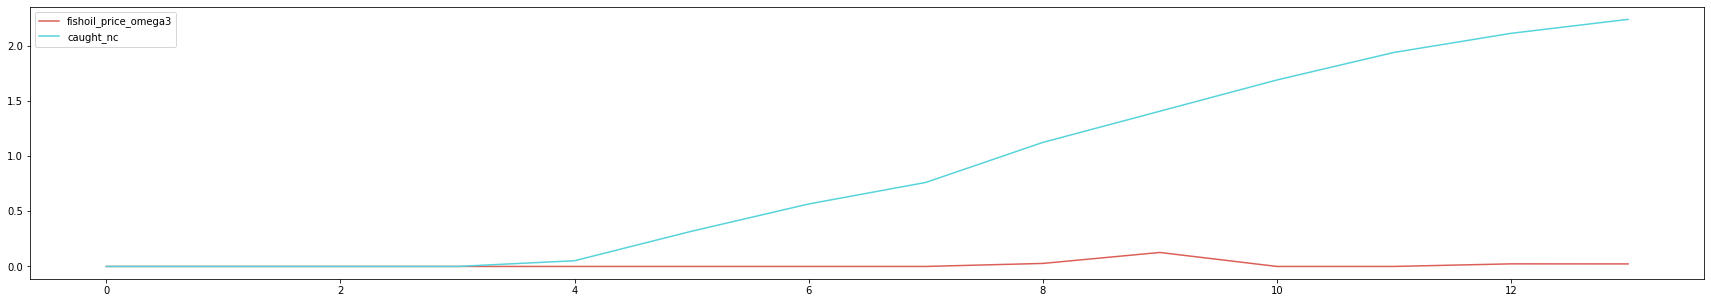

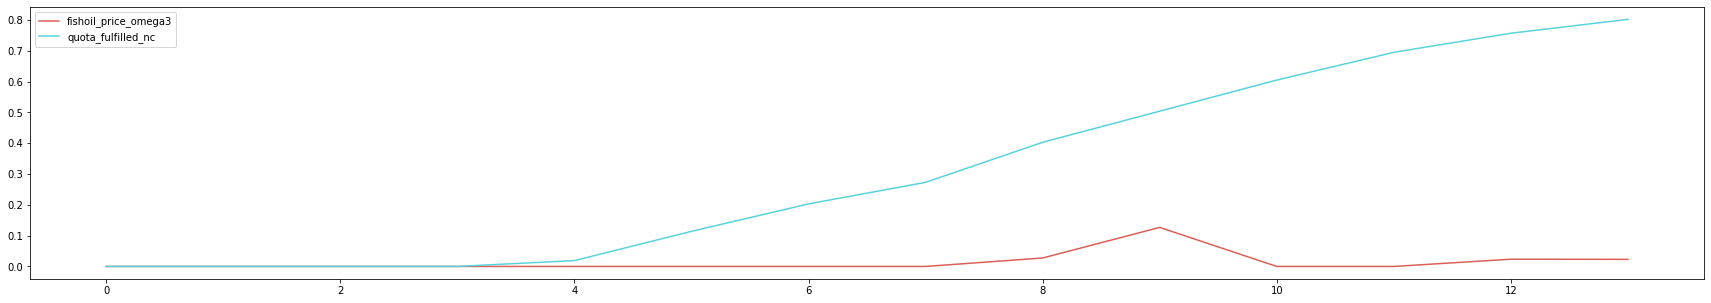

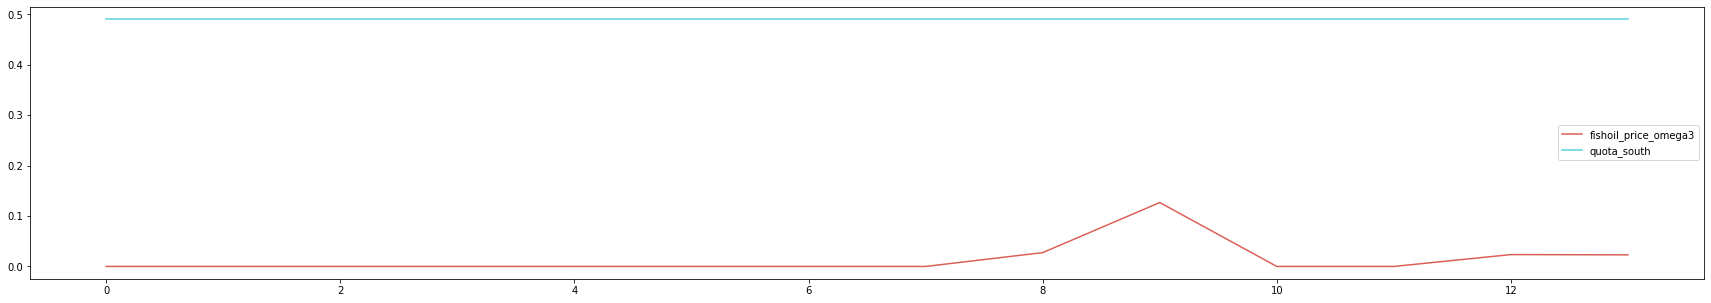

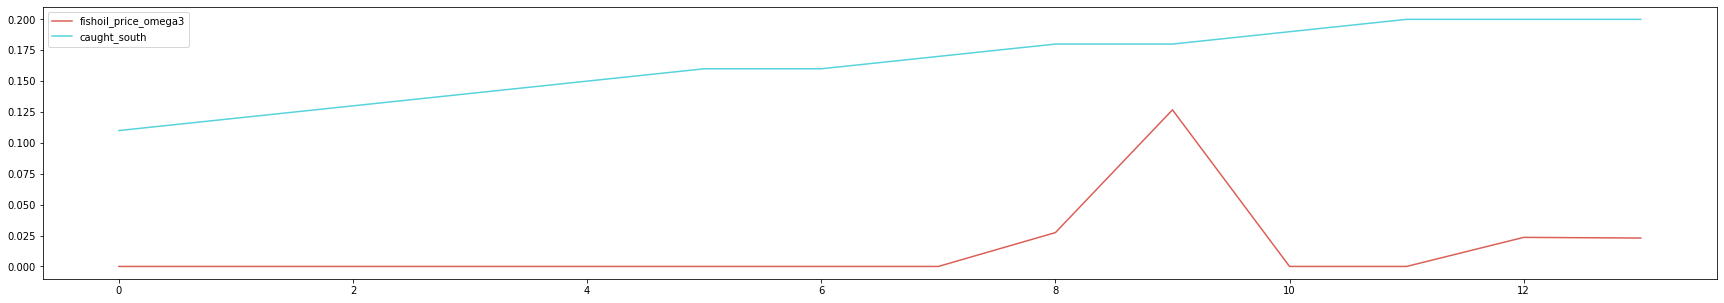

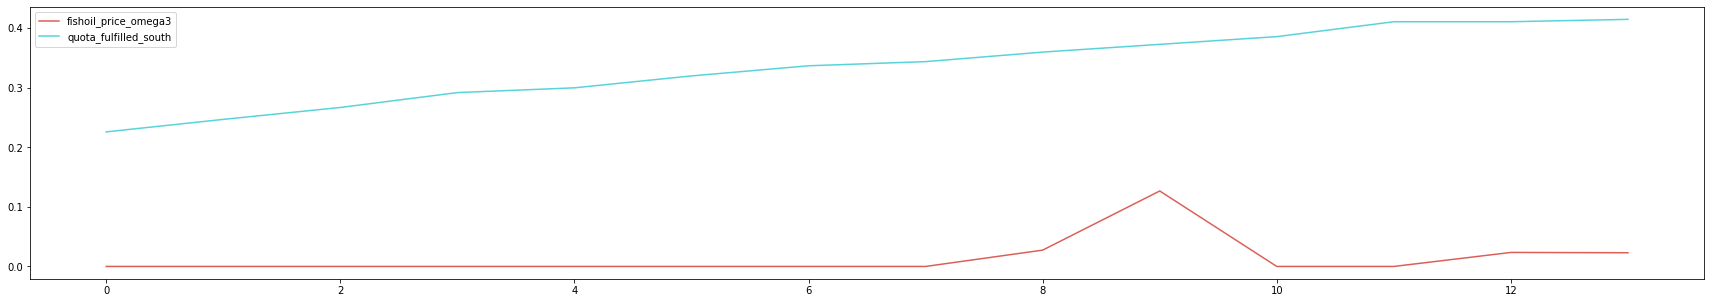

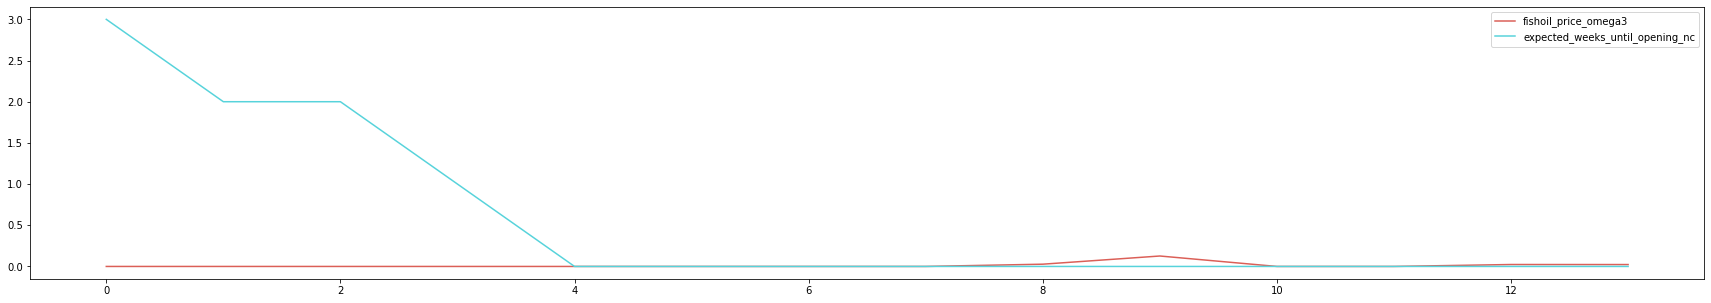

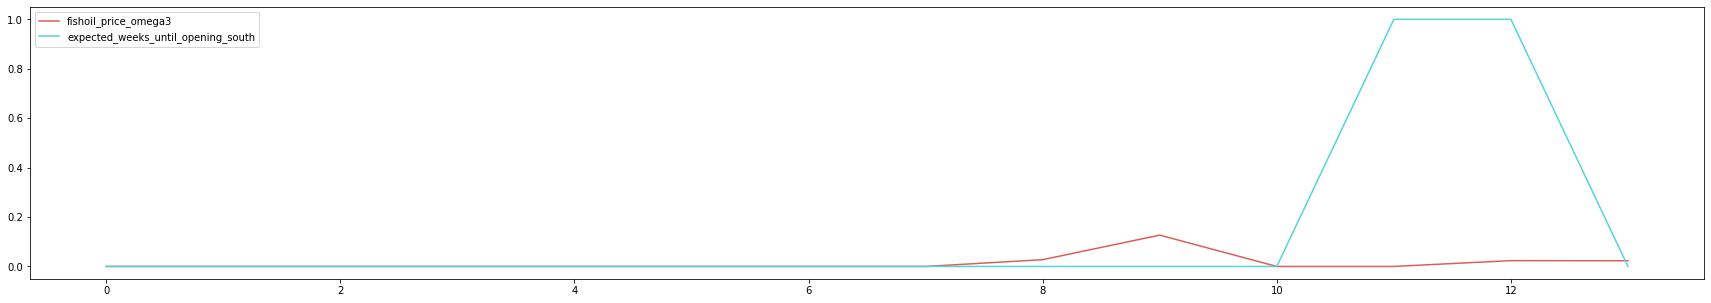

In [91]:
features = df.columns

for feature in features:
    plot_features(['fishoil_price_omega3', feature])